<h1> New York Taxi Fare Price Prediction </h1>

In this project using <b>New York</b> dataset we will predict the fare price of next trip.

The dataset can be downloaded from https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips

The dataset contains 8 features like pickup lat-lang and drop lat-lang

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Dataset/train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
df_test=pd.read_csv('./Dataset/test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.089104e+07,2.089104e+07,2.089104e+07,2.089090e+07,2.089090e+07,2.089104e+07
mean,1.134294e+01,-7.251111e+01,3.992057e+01,-7.251025e+01,3.991853e+01,1.685295e+00
std,1.665903e+01,1.304707e+01,9.525859e+00,1.292337e+01,9.660777e+00,1.322193e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


In [5]:
df.shape

(20891046, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20891046 entries, 0 to 20891045
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtypes: float64(6), object(2)
memory usage: 1.2+ GB


In [7]:
df.isnull().sum()

key                    0
fare_amount            1
pickup_datetime        1
pickup_longitude       1
pickup_latitude        1
dropoff_longitude    147
dropoff_latitude     147
passenger_count        1
dtype: int64

<h1> Data Preprocessing </h1>

<h3> Missing Values </h3>

Above we can see our dataset have minor missing values 147 records maximum.<br>So we can easily drop that data because our dataset is much  larger

Drop column <b> Key </b>also

In [8]:
df=df.dropna()
df=df.drop('key',axis=1)
df.shape

(20890899, 7)

<h3> Let's Check the coordinates data </h3>

First find pickup lat lang min max coordinates

In [9]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

3457.6256829999998 -3439.2450619999995
3406.0083950000003 -3492.263768
3457.62235 -3442.0245649999997
3400.391603 -3547.886698


Latitude is always range between -90 to 90

Longitude is always range between -180 to 180

And whatever above this range is wrong data

First check any data above this range

In [10]:
def coordinate_data():
    print(df[(df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0) ]['pickup_longitude'].count())
    print(df[(df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0) ]['pickup_latitude'].count())
    print(df[(df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0)]['dropoff_longitude'].count())
    print(df[(df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0) ]['dropoff_latitude'].count())

coordinate_data()

398452
397054
397509
396286


We can see so many records are out of range so its not possible to have 
Let's remove it...

We will use <b> ~ </b> sign to remove all data which match condition

In [11]:
df=df[~((df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0))]
df=df[~((df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0))]
df=df[~((df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0))]
df=df[~((df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0))]

# call function to check
coordinate_data()
min_max()

0
0
0
0
154.10075600000002 -168.603534
89.533332 -77.833874
154.10075600000002 -173.95763
88.75 -74.1932


In [14]:
# remove where pickup and drop location are same
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(0, 7)


In [13]:
print(df_test.pickup_latitude.min(), df_test.pickup_latitude.max())
print(df_test.pickup_longitude.min(), df_test.pickup_longitude.max())

40.573143 41.709555
-74.252193 -72.986532


In [15]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [16]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

18043
17749
19416
17715


In [17]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(20226838, 7)

Our system is not capable of proessing <b>20 Millions</b> records.

Processing <b>20 Millions</b> will take lot's of time

I'll select randomly <b>10% </b>dataset and make model

In [18]:
#Randomly select 10% data 

df = df.sample(frac=0.1)
df.shape

(2022684, 7)

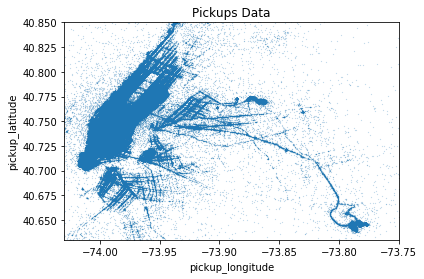

In [19]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

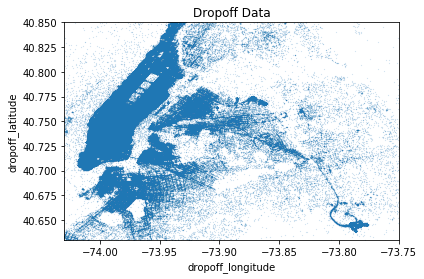

In [20]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Passenger Count Data

In [21]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

7
0


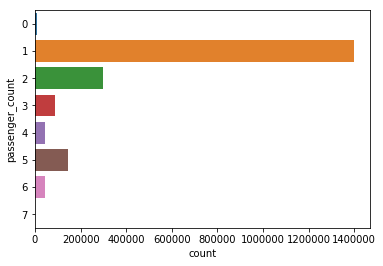

In [22]:
sns.countplot(y='passenger_count',data=df)

In [24]:
df=df[~((df['passenger_count']>6))]
df.shape

(2022683, 7)

Fare amount can not be negative so remove this data

In [25]:
df[df['fare_amount']<=0]['fare_amount'].count()
df=df[~(df['fare_amount']<=0)]

<h1>Feature Engineering </h1>

Extract day,month,year from pickup_datetime

In [26]:
df['pickup_day']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df['pickup_month']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year

In [27]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year
2196774,11.3,2010-11-19 13:40:02 UTC,-73.977723,40.753110,-73.981180,40.779698,1,19,11,2010
4448356,14.5,2011-06-04 07:41:00 UTC,-74.009563,40.705248,-73.991210,40.751230,1,4,6,2011
11019076,12.9,2010-01-16 00:59:34 UTC,-74.008643,40.722060,-73.978312,40.752691,1,16,1,2010
650259,4.1,2009-11-22 14:51:02 UTC,-73.987511,40.757953,-73.977645,40.753628,1,22,11,2009
16378236,22.0,2014-09-07 14:08:05 UTC,-73.980809,40.784943,-74.002637,40.727637,1,7,9,2014


Let's extract weekday from pickup_datetime

0 Monday

6 Sunday

In [ ]:
df['pickup_weekday'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek

Seprate pickup hour from pickup_datetime column

In [28]:
df['pickup_hour']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_hour
2196774,11.3,2010-11-19 13:40:02 UTC,-73.977723,40.753110,-73.981180,40.779698,1,19,11,2010,13
4448356,14.5,2011-06-04 07:41:00 UTC,-74.009563,40.705248,-73.991210,40.751230,1,4,6,2011,7
11019076,12.9,2010-01-16 00:59:34 UTC,-74.008643,40.722060,-73.978312,40.752691,1,16,1,2010,0
650259,4.1,2009-11-22 14:51:02 UTC,-73.987511,40.757953,-73.977645,40.753628,1,22,11,2009,14
16378236,22.0,2014-09-07 14:08:05 UTC,-73.980809,40.784943,-74.002637,40.727637,1,7,9,2014,14


Let's add the feature called <b>mid night trip</b> usually fare during night hours are high compare to day time

The trip between night 11'o clock to morning 5'o clock are labelled mid night trip  

In [29]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_hour,mid_night_trip
2196774,11.3,2010-11-19 13:40:02 UTC,-73.977723,40.753110,-73.981180,40.779698,1,19,11,2010,13,0
4448356,14.5,2011-06-04 07:41:00 UTC,-74.009563,40.705248,-73.991210,40.751230,1,4,6,2011,7,0
11019076,12.9,2010-01-16 00:59:34 UTC,-74.008643,40.722060,-73.978312,40.752691,1,16,1,2010,0,1
650259,4.1,2009-11-22 14:51:02 UTC,-73.987511,40.757953,-73.977645,40.753628,1,22,11,2009,14,0
16378236,22.0,2014-09-07 14:08:05 UTC,-73.980809,40.784943,-74.002637,40.727637,1,7,9,2014,14,0


New York City has rush hour means heavy traffic from 4 PM to 8 PM 

So fare rates may differ from other time

In [30]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_hour,mid_night_trip,rush_hour_trip
2196774,11.3,2010-11-19 13:40:02 UTC,-73.977723,40.753110,-73.981180,40.779698,1,19,11,2010,13,0,0
4448356,14.5,2011-06-04 07:41:00 UTC,-74.009563,40.705248,-73.991210,40.751230,1,4,6,2011,7,0,0
11019076,12.9,2010-01-16 00:59:34 UTC,-74.008643,40.722060,-73.978312,40.752691,1,16,1,2010,0,1,0
650259,4.1,2009-11-22 14:51:02 UTC,-73.987511,40.757953,-73.977645,40.753628,1,22,11,2009,14,0,0
16378236,22.0,2014-09-07 14:08:05 UTC,-73.980809,40.784943,-74.002637,40.727637,1,7,9,2014,14,0,0


During snow season the taxi is very less available compare to other months i.e. taxi fare during snow season is high. 

NYC has the snow season from December to March but December and March has less snow compare to Jan and Feb

So we will check if trip was in month of Jan and Feb it is during snow season 

In [31]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
2196774,11.3,2010-11-19 13:40:02 UTC,-73.977723,40.753110,-73.981180,40.779698,1,19,11,2010,13,0,0,0
4448356,14.5,2011-06-04 07:41:00 UTC,-74.009563,40.705248,-73.991210,40.751230,1,4,6,2011,7,0,0,0
11019076,12.9,2010-01-16 00:59:34 UTC,-74.008643,40.722060,-73.978312,40.752691,1,16,1,2010,0,1,0,1
650259,4.1,2009-11-22 14:51:02 UTC,-73.987511,40.757953,-73.977645,40.753628,1,22,11,2009,14,0,0,0
16378236,22.0,2014-09-07 14:08:05 UTC,-73.980809,40.784943,-74.002637,40.727637,1,7,9,2014,14,0,0,0


<h3> Distance calculator between pickup and drop coordinates </h3>

Distance and the fare amount has the direct correlation if distance increase fare will be increase

We will use python's geopy library to add column trip_distance which will have distance between two coordinates

In [188]:
from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

In [ ]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

<h3> Mapping </h3>

<b>Convert specific pickup and drop Coordinates into location </b>

We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [33]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

In [34]:
def pickup_place(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (30584, 14)
Manhattan Pickup Total  (1900661, 14)
Brroklyn Pickup Total  (22968, 14)
Bronx Pickup Total  (2548, 14)
LaGuardia Pickup Total  (40906, 14)


In [35]:
def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , drop_place(JFK,df).shape)
print("Manhattan Pickup Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , drop_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , drop_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , drop_place(LaGuardia,df).shape)

JFK Pickup Total  (15387, 14)
Manhattan Pickup Total  (1842382, 14)
Brroklyn Pickup Total  (45101, 14)
Bronx Pickup Total  (12887, 14)
LaGuardia Pickup Total  (26560, 14)


In [40]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup_place(Area,data)
    d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

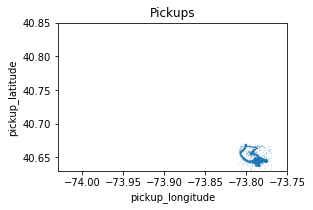

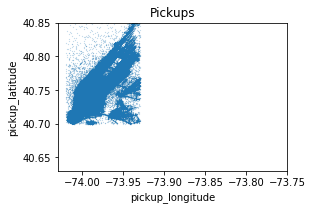

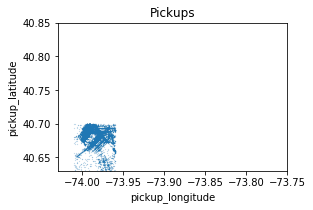

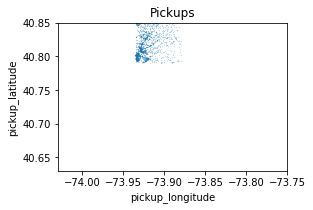

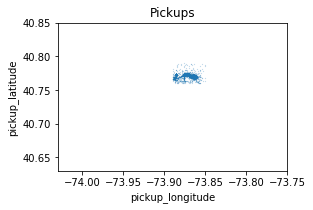

In [41]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

In [42]:
def plotDropAreaEachPlace(Area,data,ax):
    d=drop_place(Area,data)
    d.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

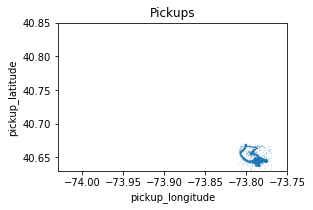

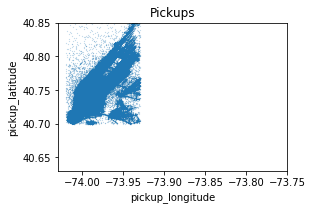

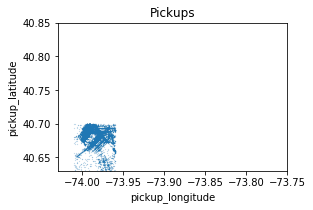

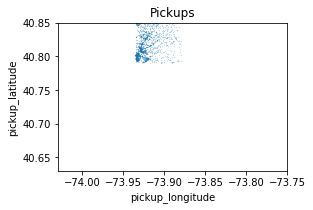

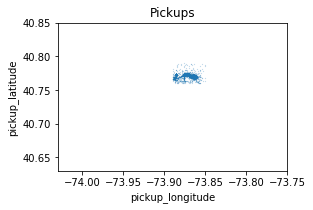

In [43]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g  pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [44]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [ ]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

In [ ]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

Airport trip has the fixed rate so it is good to have a column which show whether trip is airport trip or not

In [45]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [ ]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

Till here we have pre-processed our data and feature engineering done

<h3> Save the pre-processed and feature_eng data in CSV file </h3>

In [ ]:
df.to_csv("feature_model.csv",index=False)

<h3> Read Pre-processed file </h3>

In [48]:
df=pd.read_csv("feature_model.csv")
df.shape

(2022562, 27)

<h1> Data Visualization </h1>

The next step is to get insight to data.

Remove any noisy or outlier data and understand data distribution

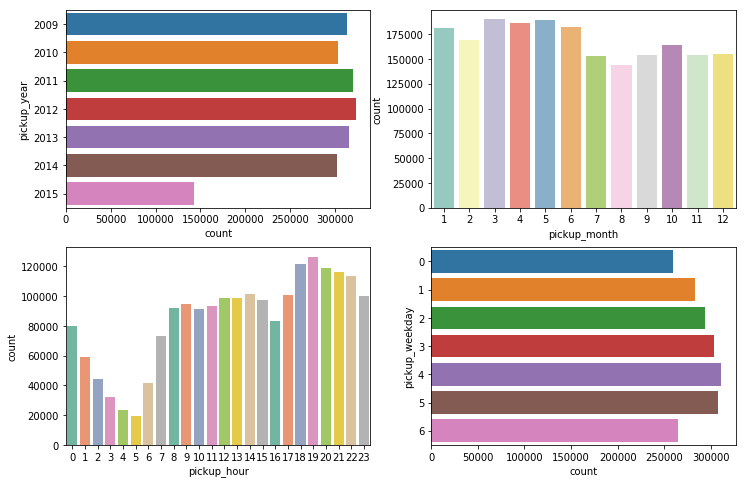

In [49]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set3')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

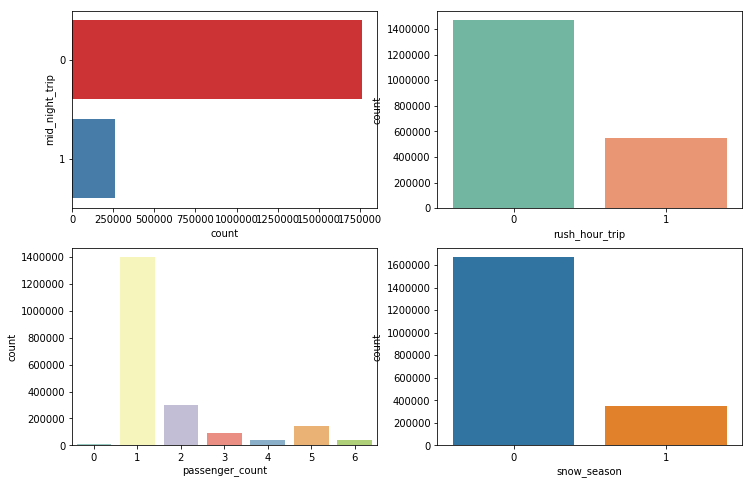

In [50]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df,palette='Set3')

plt.subplot(2,2,4)
sns.countplot(x='snow_season', data=df)

plt.show()

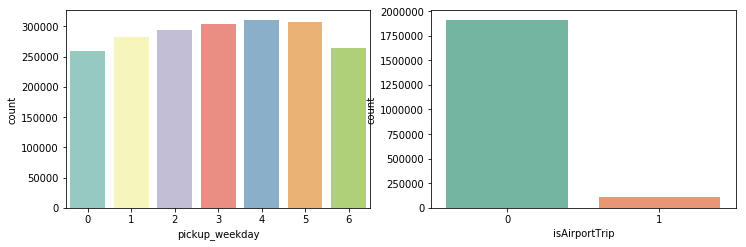

In [51]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='pickup_weekday',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.countplot(x='isAirportTrip',data=df,palette='Set2')

<h3> Pickup Location Count Plot</h3> 

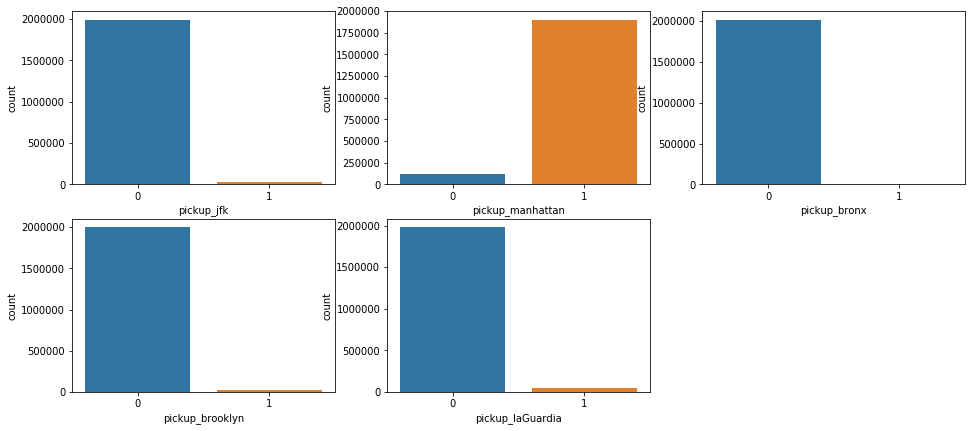

In [52]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
#plt.show()

<h3> Drop Location Count Plot</h3> 

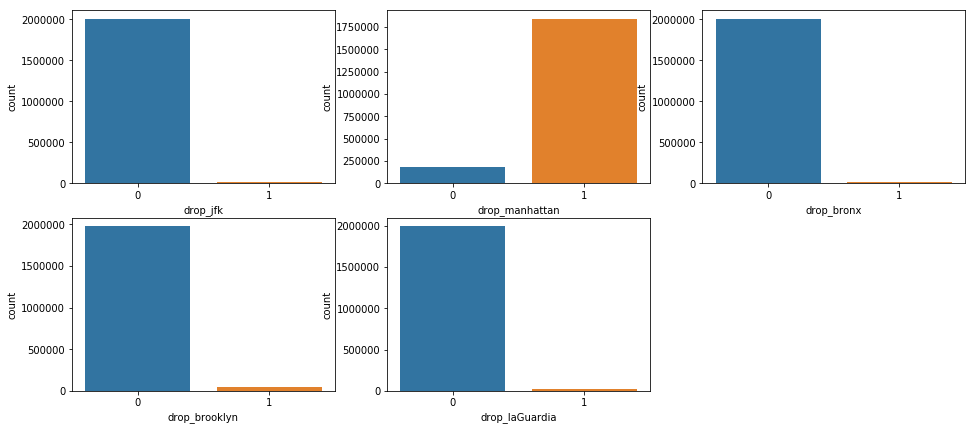

In [53]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

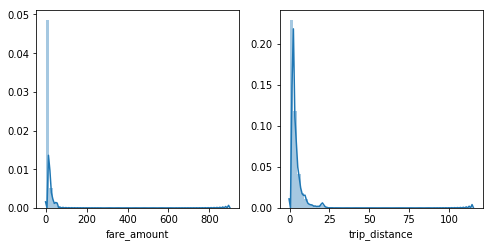

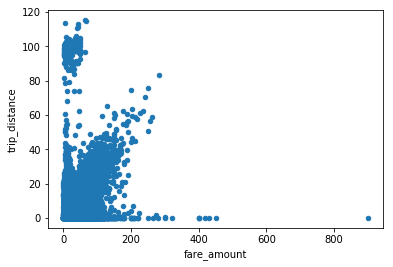

In [54]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

df.plot(x='fare_amount',y='trip_distance',kind='scatter')

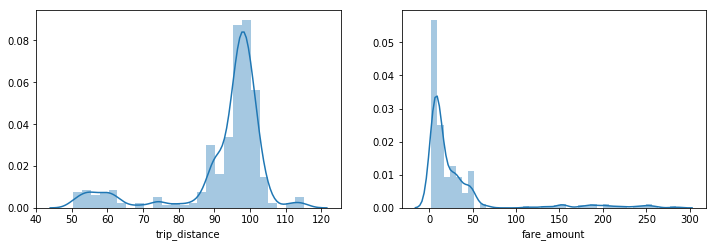

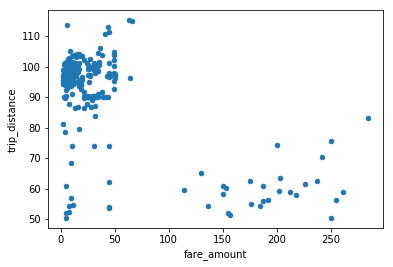

In [55]:
def fare_and_trip_dist_50():
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)

    x=df[df['trip_distance']>50]
    sns.distplot(x['trip_distance'],kde=True)

    plt.subplot(2,2,2)
    sns.distplot(x['fare_amount'],kde=True)

    x.plot(x='fare_amount',y='trip_distance',kind='scatter')
fare_and_trip_dist_50()

In [56]:
#remove data where trip distance > 50

df=df[~(df['trip_distance']>50)]
df=df[~(df['fare_amount']>=220)]

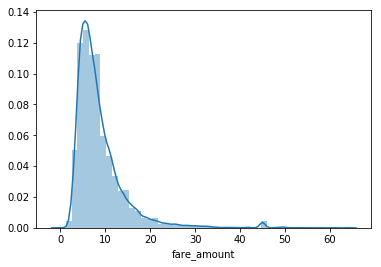

In [57]:
cancel_ride=df[(df['fare_amount']>=0) & (df['passenger_count']==0)]
sns.distplot(cancel_ride['fare_amount'],kde=True)

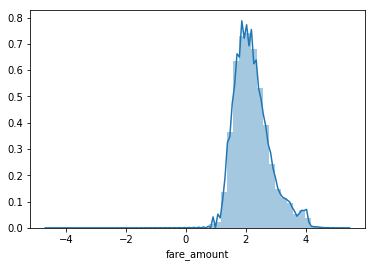

In [58]:
sns.distplot(np.log(df['fare_amount']),kde=True)

<h3> Airport vs Non Aiport Trip Fare Distributinon </h3>

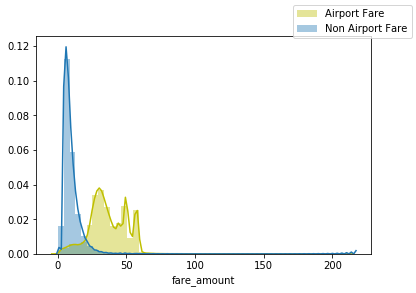

In [59]:
df_airport=df[df['isAirportTrip']==1]
df_non_airport=df[df['isAirportTrip']==0]

fig = plt.figure(figsize=(6,4))
sns.distplot(df_airport['fare_amount'],kde=True,color="y")
sns.distplot(df_non_airport['fare_amount'],kde=True)
fig.legend(labels=['Airport Fare','Non Airport Fare'])
plt.show()

<h3> Different Area Fare Distribution </h3>

In [60]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]

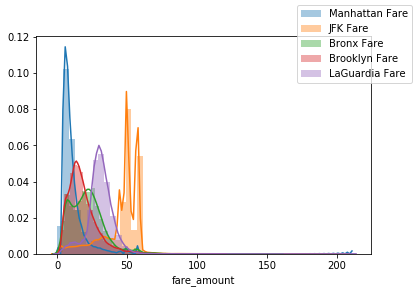

In [61]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df_manhattan['fare_amount'],kde=True)
sns.distplot(df_jfk['fare_amount'],kde=True)
sns.distplot(df_bronx['fare_amount'],kde=True)
sns.distplot(df_brooklyn['fare_amount'],kde=True)
sns.distplot(df_LGD['fare_amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

<h3> Fare Distribution of Manhattan </h3>

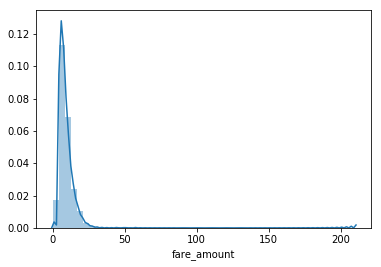

In [62]:
df_man=df[ (df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1)]
sns.distplot(df_man['fare_amount'],kde=True)

In [63]:
df_man['fare_amount'].sum()/df_man.shape[0]
df=df[~((df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1) & (df['fare_amount'] > 20))]

<h3> Fare Distribution at Different Time Zone </h3>

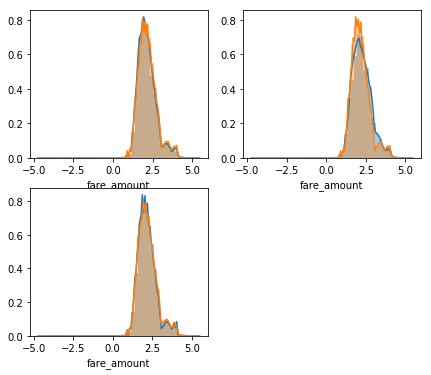

In [64]:
df_snow=df[df['snow_season']==1]
df_non_snow=df[df['snow_season']==0]

fig = plt.figure(figsize=(7,6))
ax=plt.subplot(2,2,1)
sns.distplot(np.log(df_snow['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_snow['fare_amount']),ax=ax)


df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_mid['fare_amount']),ax=ax)

df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_rush_hour['fare_amount']),ax=ax)

<h2> Correlation Heatmap</h2>

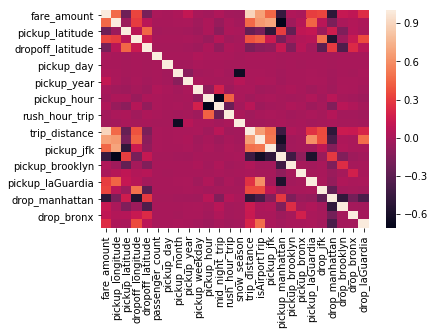

In [65]:
sns.heatmap(df.corr())

In [193]:
df=df.drop('pickup_datetime',axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_month,pickup_year,pickup_weekday,...,pickup_jfk,pickup_manhattan,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_jfk,drop_manhattan,drop_brooklyn,drop_bronx,drop_laGuardia
0,6.0,-74.005457,40.739317,-73.993169,40.743069,2,15,5,2013,2,...,0,1,0,0,0,0,1,0,0,0
1,15.3,-73.966702,40.761237,-74.006240,40.743692,2,15,2,2010,0,...,0,1,0,0,0,0,1,0,0,0
2,13.3,-73.982323,40.768415,-74.002835,40.723653,2,21,8,2012,1,...,0,1,0,0,0,0,1,0,0,0
3,8.5,-73.993973,40.732935,-74.006775,40.712583,5,8,4,2009,2,...,0,1,0,0,0,0,1,0,0,0
4,16.9,-73.971797,40.746223,-73.991578,40.749785,2,2,6,2011,3,...,0,1,0,0,0,0,1,0,0,0


<h3> Apply all Feature engineering to Test Data </h3>

We don't need to preprocessed the test data.

Test data is mostly preprocessed itself

In [191]:
df_test['pickup_day']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df_test['pickup_month']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df_test['pickup_year']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year

df_test['pickup_weekday'] = pd.DatetimeIndex(df_test.pickup_datetime).dayofweek
df_test['pickup_hour']=pd.to_datetime(df_test.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour

df_test['mid_night_trip']=((df_test['pickup_hour']>23) | (df_test['pickup_hour']<6)).astype(int)
df_test['rush_hour_trip']=((df_test['pickup_hour']>=16) & (df_test['pickup_hour']<=20)).astype(int)
df_test['snow_season']=((df_test['pickup_month']==1) | (df_test['pickup_month']==2)).astype(int)
df_test['trip_distance']=list(map(distance_calculate,df_test['pickup_latitude'],df_test['pickup_longitude'],df_test['dropoff_latitude'],df_test['dropoff_longitude']))

df_test['pickup_manhattan']=df_test.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df_test['pickup_jfk']=df_test.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df_test['pickup_brooklyn']=df_test.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df_test['pickup_bronx']=df_test.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df_test['pickup_laGuardia']=df_test.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

df_test['drop_manhattan']=df_test.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df_test['drop_jfk']=df_test.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df_test['drop_brooklyn']=df_test.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df_test['drop_bronx']=df_test.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df_test['drop_laGuardia']=df_test.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

df_test['isAirportTrip']=df_test.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

df_test=df_test.drop(columns=['pickup_datetime','key'])
df_test.head()

<h1> Modeling </h1>

The dataset is very large algorithms like SVM KNN will be slow to perform

We will use Ensemble Methods like Random Forest, XGBoost etc.

In [194]:
#Extract Features and Target Column
X=df.drop(columns=['fare_amount'])
y=df['fare_amount']

In [196]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

<h3> Random Forest Regressor </h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor(n_estimators=100)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
mean_squared_error(y_test,y_pred)

<h3> K-Fold Cross Validation </h3>

In [200]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(reg,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_score=np.sqrt(-score)

print(rmse_score)
print(rmse_score.mean())
print(rmse_score.std())

[ 9.49029552 10.00978808  9.46217355  9.38537576  9.44701975]
9.558930532557962
0.22803091380886958
